## C20_FM_CellProfiler_DataPreprocessing 

## Data cleaning 
    - Deletion of unnecessary columns in cell and nucleus csvs 
    - Concatenating(Merging) cell and nucleus csvs
    
### Inputs (to be changed)
    - Files that will be loaded for preprocessing - cells, filtered nucleus, experiment conditions
    - Change Cell Density under the Feature engineering section
   

In [46]:
##inputs: Cells csv, Filtered Nucleus csv, Experiment Conditions csv
cellsP1_csv_path = 'C:/Users/krd38684/Desktop/C20Experiment/Plate 1/MyExpt_plate1Cells.csv'
nucleusP1_csv_path = 'C:/Users/krd38684/Desktop/C20Experiment/Plate 1/MyExpt_plate1FilteredNuclei.csv'
cellsP2_csv_path = 'C:/Users/krd38684/Desktop/C20Experiment/Plate 2/MyExpt_plate2Cells.csv'
nucleusP2_csv_path = 'C:/Users/krd38684/Desktop/C20Experiment/Plate 2/MyExpt_plate2FilteredNuclei.csv'
conditions_csv_path = 'C:/Users/krd38684/Desktop/C20Experiment/Lookup table for experiment conditions.csv'


In [47]:
import pandas as pd #Python Library for reading and manipulating tabulated data

In [48]:
import numpy as np #Python Library for various operations on the matrices

In [49]:
# Reading all files  
cellsP1 = pd.read_csv(cellsP1_csv_path)
nucleusP1 = pd.read_csv(nucleusP1_csv_path)
cellsP2 = pd.read_csv(cellsP2_csv_path)
nucleusP2 = pd.read_csv(nucleusP2_csv_path)
condition = pd.read_csv(conditions_csv_path)

### Processing : Cells

In [50]:
cellsP1.info()
cellsP1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ImageNumber                     120274 non-null  int64  
 1   ObjectNumber                    120274 non-null  int64  
 2   Metadata_ChannelIn              0 non-null       float64
 3   Metadata_FileLocation           0 non-null       float64
 4   Metadata_Frame                  120274 non-null  int64  
 5   Metadata_ImageType              0 non-null       float64
 6   Metadata_Plate                  120274 non-null  int64  
 7   Metadata_Series                 120274 non-null  int64  
 8   Metadata_Site                   120274 non-null  int64  
 9   Metadata_Time                   120274 non-null  int64  
 10  Metadata_Well                   120274 non-null  object 
 11  AreaShape_Area                  120274 non-null  int64  
 12  AreaShape_Boundi

(120274, 41)

In [51]:
cellsP2.info()
cellsP2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ImageNumber                     97155 non-null  int64  
 1   ObjectNumber                    97155 non-null  int64  
 2   Metadata_ChannelIn              0 non-null      float64
 3   Metadata_FileLocation           0 non-null      float64
 4   Metadata_Frame                  97155 non-null  int64  
 5   Metadata_ImageType              0 non-null      float64
 6   Metadata_Plate                  97155 non-null  int64  
 7   Metadata_Series                 97155 non-null  int64  
 8   Metadata_Site                   97155 non-null  int64  
 9   Metadata_Time                   97155 non-null  int64  
 10  Metadata_Well                   97155 non-null  object 
 11  AreaShape_Area                  97155 non-null  int64  
 12  AreaShape_BoundingBoxArea       

(97155, 41)

In [52]:
cellsP1.head()

,ImageNumber,ObjectNumber,Metadata_ChannelIn,Metadata_FileLocation,Metadata_Frame,Metadata_ImageType,Metadata_Plate,Metadata_Series,Metadata_Site,Metadata_Time,...,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_FilteredNuclei,Parent_Nuclei
0,1,1,NaN,NaN,0,NaN,1,0,1,1,...,30.983185,-0.610703,255.456890,0.773711,4858.959308,42.560529,0,1,1,7
1,1,2,NaN,NaN,0,NaN,1,0,1,1,...,22.274803,-1.443005,291.539105,0.863582,3856.566282,35.025404,0,2,2,8
2,1,3,NaN,NaN,0,NaN,1,0,1,1,...,30.476310,0.095825,345.220346,0.577372,5296.574531,90.312932,0,3,3,13
3,1,4,NaN,NaN,0,NaN,1,0,1,1,...,26.460825,-1.196446,247.338095,0.620893,5359.058345,65.977612,0,4,4,14
4,1,5,NaN,NaN,0,NaN,1,0,1,1,...,26.883221,-0.471400,280.877200,0.784771,675.253877,77.739920,0,5,5,15


In [53]:
cellsP2.head()

,ImageNumber,ObjectNumber,Metadata_ChannelIn,Metadata_FileLocation,Metadata_Frame,Metadata_ImageType,Metadata_Plate,Metadata_Series,Metadata_Site,Metadata_Time,...,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_FilteredNuclei,Parent_Nuclei
0,1,1,NaN,NaN,0,NaN,2,0,1,1,...,45.871808,1.031572,389.883297,0.630941,3255.617801,52.877545,0,1,1,5
1,1,2,NaN,NaN,0,NaN,2,0,1,1,...,34.942877,-1.398249,180.610173,0.804997,1567.937169,43.527631,0,2,2,7
2,1,3,NaN,NaN,0,NaN,2,0,1,1,...,38.918705,-1.462749,292.450793,0.713824,3729.139803,54.511924,0,3,3,10
3,1,4,NaN,NaN,0,NaN,2,0,1,1,...,27.153217,-1.560370,123.012193,0.938525,2963.989083,48.316594,0,4,4,11
4,1,5,NaN,NaN,0,NaN,2,0,1,1,...,32.616855,-0.132969,199.645707,0.903796,4132.043728,53.104143,0,5,5,12


#### Deletion of unnecessary columns in cell csv

In [54]:
columns_to_drop = ['Metadata_ChannelIn',
         'Metadata_FileLocation',
         'Metadata_Frame',
         'Metadata_Series',
         'Metadata_Time',
         'Metadata_ImageType',
         'AreaShape_Center_X',
         'AreaShape_Center_Y',
         'AreaShape_EulerNumber',
         'Location_Center_X',
         'Location_Center_Y',
         'Location_Center_Z',
         'Number_Object_Number',
         'Parent_FilteredNuclei',
         'Parent_Nuclei',
         'AreaShape_Orientation',
         'AreaShape_BoundingBoxArea',
         'AreaShape_BoundingBoxMaximum_X',
         'AreaShape_BoundingBoxMaximum_Y',
         'AreaShape_BoundingBoxMinimum_X',
         'AreaShape_BoundingBoxMinimum_Y',                
]

In [55]:
cellsP1.drop(columns_to_drop, axis=1, inplace = True)

In [56]:
cellsP2.drop(columns_to_drop, axis=1, inplace = True)

In [57]:
cellsP1.info()
cellsP1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ImageNumber                   120274 non-null  int64  
 1   ObjectNumber                  120274 non-null  int64  
 2   Metadata_Plate                120274 non-null  int64  
 3   Metadata_Site                 120274 non-null  int64  
 4   Metadata_Well                 120274 non-null  object 
 5   AreaShape_Area                120274 non-null  int64  
 6   AreaShape_Compactness         120274 non-null  float64
 7   AreaShape_Eccentricity        120274 non-null  float64
 8   AreaShape_EquivalentDiameter  120274 non-null  float64
 9   AreaShape_Extent              120274 non-null  float64
 10  AreaShape_FormFactor          120274 non-null  float64
 11  AreaShape_MajorAxisLength     120274 non-null  float64
 12  AreaShape_MaxFeretDiameter    120274 non-nul

(120274, 20)

In [58]:
cellsP2.info()
cellsP2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ImageNumber                   97155 non-null  int64  
 1   ObjectNumber                  97155 non-null  int64  
 2   Metadata_Plate                97155 non-null  int64  
 3   Metadata_Site                 97155 non-null  int64  
 4   Metadata_Well                 97155 non-null  object 
 5   AreaShape_Area                97155 non-null  int64  
 6   AreaShape_Compactness         97155 non-null  float64
 7   AreaShape_Eccentricity        97155 non-null  float64
 8   AreaShape_EquivalentDiameter  97155 non-null  float64
 9   AreaShape_Extent              97155 non-null  float64
 10  AreaShape_FormFactor          97155 non-null  float64
 11  AreaShape_MajorAxisLength     97155 non-null  float64
 12  AreaShape_MaxFeretDiameter    97155 non-null  float64
 13  A

(97155, 20)

In [59]:
cellsP1.columns = [col + '_cell' for col in cellsP1.columns] #Adding suffix "cell" to distinguish from nucleus data

In [60]:
cellsP2.columns = [col + '_cell' for col in cellsP2.columns] #Adding suffix "cell" to distinguish from nucleus data

In [61]:
cellsP1.columns = [col.replace('AreaShape_', '') for col in cellsP1.columns] #Deleting prefix "Areashape_" to distinguish from nucleus data

In [62]:
cellsP2.columns = [col.replace('AreaShape_', '') for col in cellsP2.columns] #Deleting prefix "Areashape_" to distinguish from nucleus data

In [63]:
cellsP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ImageNumber_cell         120274 non-null  int64  
 1   ObjectNumber_cell        120274 non-null  int64  
 2   Metadata_Plate_cell      120274 non-null  int64  
 3   Metadata_Site_cell       120274 non-null  int64  
 4   Metadata_Well_cell       120274 non-null  object 
 5   Area_cell                120274 non-null  int64  
 6   Compactness_cell         120274 non-null  float64
 7   Eccentricity_cell        120274 non-null  float64
 8   EquivalentDiameter_cell  120274 non-null  float64
 9   Extent_cell              120274 non-null  float64
 10  FormFactor_cell          120274 non-null  float64
 11  MajorAxisLength_cell     120274 non-null  float64
 12  MaxFeretDiameter_cell    120274 non-null  float64
 13  MaximumRadius_cell       120274 non-null  float64
 14  Mean

In [64]:
cellsP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ImageNumber_cell         97155 non-null  int64  
 1   ObjectNumber_cell        97155 non-null  int64  
 2   Metadata_Plate_cell      97155 non-null  int64  
 3   Metadata_Site_cell       97155 non-null  int64  
 4   Metadata_Well_cell       97155 non-null  object 
 5   Area_cell                97155 non-null  int64  
 6   Compactness_cell         97155 non-null  float64
 7   Eccentricity_cell        97155 non-null  float64
 8   EquivalentDiameter_cell  97155 non-null  float64
 9   Extent_cell              97155 non-null  float64
 10  FormFactor_cell          97155 non-null  float64
 11  MajorAxisLength_cell     97155 non-null  float64
 12  MaxFeretDiameter_cell    97155 non-null  float64
 13  MaximumRadius_cell       97155 non-null  float64
 14  MeanRadius_cell       

### Processing : Nucleus

In [65]:
nucleusP1.info()
nucleusP1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ImageNumber                     120274 non-null  int64  
 1   ObjectNumber                    120274 non-null  int64  
 2   Metadata_ChannelIn              0 non-null       float64
 3   Metadata_FileLocation           0 non-null       float64
 4   Metadata_Frame                  120274 non-null  int64  
 5   Metadata_ImageType              0 non-null       float64
 6   Metadata_Plate                  120274 non-null  int64  
 7   Metadata_Series                 120274 non-null  int64  
 8   Metadata_Site                   120274 non-null  int64  
 9   Metadata_Time                   120274 non-null  int64  
 10  Metadata_Well                   120274 non-null  object 
 11  AreaShape_Area                  120274 non-null  int64  
 12  AreaShape_Boundi

(120274, 41)

In [66]:
nucleusP1.head()

,ImageNumber,ObjectNumber,Metadata_ChannelIn,Metadata_FileLocation,Metadata_Frame,Metadata_ImageType,Metadata_Plate,Metadata_Series,Metadata_Site,Metadata_Time,...,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,Children_Cells_Count,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_Nuclei
0,1,1,NaN,NaN,0,NaN,1,0,1,1,...,20.950050,-0.441338,104.740115,0.958631,1,4861.827381,31.315476,0,1,7
1,1,2,NaN,NaN,0,NaN,1,0,1,1,...,22.633441,-1.277627,91.840620,0.969305,1,3861.788333,35.150000,0,2,8
2,1,3,NaN,NaN,0,NaN,1,0,1,1,...,25.458306,-0.837268,92.225397,0.960720,1,5293.371380,57.475298,0,3,13
3,1,4,NaN,NaN,0,NaN,1,0,1,1,...,21.711980,-0.978576,86.669048,0.967742,1,5348.277778,66.518519,0,4,14
4,1,5,NaN,NaN,0,NaN,1,0,1,1,...,25.402278,-0.605281,108.225397,0.956364,1,681.065906,68.045627,0,5,15


In [67]:
nucleusP2.info()
nucleusP2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ImageNumber                     97155 non-null  int64  
 1   ObjectNumber                    97155 non-null  int64  
 2   Metadata_ChannelIn              0 non-null      float64
 3   Metadata_FileLocation           0 non-null      float64
 4   Metadata_Frame                  97155 non-null  int64  
 5   Metadata_ImageType              0 non-null      float64
 6   Metadata_Plate                  97155 non-null  int64  
 7   Metadata_Series                 97155 non-null  int64  
 8   Metadata_Site                   97155 non-null  int64  
 9   Metadata_Time                   97155 non-null  int64  
 10  Metadata_Well                   97155 non-null  object 
 11  AreaShape_Area                  97155 non-null  int64  
 12  AreaShape_BoundingBoxArea       

(97155, 41)

In [68]:
nucleusP2.head()

,ImageNumber,ObjectNumber,Metadata_ChannelIn,Metadata_FileLocation,Metadata_Frame,Metadata_ImageType,Metadata_Plate,Metadata_Series,Metadata_Site,Metadata_Time,...,AreaShape_MinorAxisLength,AreaShape_Orientation,AreaShape_Perimeter,AreaShape_Solidity,Children_Cells_Count,Location_Center_X,Location_Center_Y,Location_Center_Z,Number_Object_Number,Parent_Nuclei
0,1,1,NaN,NaN,0,NaN,2,0,1,1,...,21.288390,1.105449,94.669048,0.969984,1,3233.882736,40.908795,0,1,5
1,1,2,NaN,NaN,0,NaN,2,0,1,1,...,24.822855,-1.494279,95.254834,0.973490,1,1563.114977,43.553707,0,2,7
2,1,3,NaN,NaN,0,NaN,2,0,1,1,...,23.966410,-1.132295,95.254834,0.976226,1,3731.677321,50.480974,0,3,10
3,1,4,NaN,NaN,0,NaN,2,0,1,1,...,22.826665,-1.552124,83.254834,0.947977,1,2957.402439,49.254065,0,4,11
4,1,5,NaN,NaN,0,NaN,2,0,1,1,...,25.169014,-0.177052,92.669048,0.961420,1,4128.507223,50.515249,0,5,12


#### Deletion of unnecessary columns in nucleus csv

In [69]:
nucleusP1.drop(['Metadata_ChannelIn',
         'Metadata_FileLocation',
         'Metadata_Frame',
         'Metadata_Series',
         'Metadata_Time',
         'Metadata_ImageType',
         'AreaShape_Center_X',
         'AreaShape_Center_Y',
         'AreaShape_EulerNumber',
         'Location_Center_X',
         'Location_Center_Y',
         'Location_Center_Z',
         'Number_Object_Number',
         'Children_Cells_Count',
         'Parent_Nuclei',
         'Metadata_Well',
         'Metadata_Plate',
         'AreaShape_Orientation',
         'AreaShape_BoundingBoxArea',
         'AreaShape_BoundingBoxMaximum_X',
         'AreaShape_BoundingBoxMaximum_Y',
         'AreaShape_BoundingBoxMinimum_X',
         'AreaShape_BoundingBoxMinimum_Y',                
], axis=1, inplace = True)

In [70]:
nucleusP2.drop(['Metadata_ChannelIn',
         'Metadata_FileLocation',
         'Metadata_Frame',
         'Metadata_Series',
         'Metadata_ImageType',
         'Metadata_Time',
         'AreaShape_Center_X',
         'AreaShape_Center_Y',
         'AreaShape_EulerNumber',
         'Location_Center_X',
         'Location_Center_Y',
         'Location_Center_Z',
         'Number_Object_Number',
         'Children_Cells_Count',
         'Parent_Nuclei',
         'Metadata_Well',
         'Metadata_Plate',
         'AreaShape_Orientation',
         'AreaShape_BoundingBoxArea',
         'AreaShape_BoundingBoxMaximum_X',
         'AreaShape_BoundingBoxMaximum_Y',
         'AreaShape_BoundingBoxMinimum_X',
         'AreaShape_BoundingBoxMinimum_Y',
], axis=1, inplace = True)

In [71]:
nucleusP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ImageNumber                   120274 non-null  int64  
 1   ObjectNumber                  120274 non-null  int64  
 2   Metadata_Site                 120274 non-null  int64  
 3   AreaShape_Area                120274 non-null  int64  
 4   AreaShape_Compactness         120274 non-null  float64
 5   AreaShape_Eccentricity        120274 non-null  float64
 6   AreaShape_EquivalentDiameter  120274 non-null  float64
 7   AreaShape_Extent              120274 non-null  float64
 8   AreaShape_FormFactor          120274 non-null  float64
 9   AreaShape_MajorAxisLength     120274 non-null  float64
 10  AreaShape_MaxFeretDiameter    120274 non-null  float64
 11  AreaShape_MaximumRadius       120274 non-null  float64
 12  AreaShape_MeanRadius          120274 non-nul

In [72]:
nucleusP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ImageNumber                   97155 non-null  int64  
 1   ObjectNumber                  97155 non-null  int64  
 2   Metadata_Site                 97155 non-null  int64  
 3   AreaShape_Area                97155 non-null  int64  
 4   AreaShape_Compactness         97155 non-null  float64
 5   AreaShape_Eccentricity        97155 non-null  float64
 6   AreaShape_EquivalentDiameter  97155 non-null  float64
 7   AreaShape_Extent              97155 non-null  float64
 8   AreaShape_FormFactor          97155 non-null  float64
 9   AreaShape_MajorAxisLength     97155 non-null  float64
 10  AreaShape_MaxFeretDiameter    97155 non-null  float64
 11  AreaShape_MaximumRadius       97155 non-null  float64
 12  AreaShape_MeanRadius          97155 non-null  float64
 13  A

In [73]:
nucleusP1.columns = [str(col) + '_nucleus' for col in nucleusP1.columns] #Adding suffix "nucleus" to distinguish from nucleus data

In [74]:
nucleusP2.columns = [str(col) + '_nucleus' for col in nucleusP2.columns] #Adding suffix "nucleus" to distinguish from nucleus data

In [75]:
nucleusP1.columns = [col.replace('AreaShape_', '') for col in nucleusP1.columns] #Deleting prefix "Areashape_" to distinguish from nucleus data

In [76]:
nucleusP2.columns = [col.replace('AreaShape_', '') for col in nucleusP2.columns] #Deleting prefix "Areashape_" to distinguish from nucleus data

In [77]:
nucleusP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ImageNumber_nucleus         120274 non-null  int64  
 1   ObjectNumber_nucleus        120274 non-null  int64  
 2   Metadata_Site_nucleus       120274 non-null  int64  
 3   Area_nucleus                120274 non-null  int64  
 4   Compactness_nucleus         120274 non-null  float64
 5   Eccentricity_nucleus        120274 non-null  float64
 6   EquivalentDiameter_nucleus  120274 non-null  float64
 7   Extent_nucleus              120274 non-null  float64
 8   FormFactor_nucleus          120274 non-null  float64
 9   MajorAxisLength_nucleus     120274 non-null  float64
 10  MaxFeretDiameter_nucleus    120274 non-null  float64
 11  MaximumRadius_nucleus       120274 non-null  float64
 12  MeanRadius_nucleus          120274 non-null  float64
 13  MedianRadius_n

In [78]:
nucleusP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ImageNumber_nucleus         97155 non-null  int64  
 1   ObjectNumber_nucleus        97155 non-null  int64  
 2   Metadata_Site_nucleus       97155 non-null  int64  
 3   Area_nucleus                97155 non-null  int64  
 4   Compactness_nucleus         97155 non-null  float64
 5   Eccentricity_nucleus        97155 non-null  float64
 6   EquivalentDiameter_nucleus  97155 non-null  float64
 7   Extent_nucleus              97155 non-null  float64
 8   FormFactor_nucleus          97155 non-null  float64
 9   MajorAxisLength_nucleus     97155 non-null  float64
 10  MaxFeretDiameter_nucleus    97155 non-null  float64
 11  MaximumRadius_nucleus       97155 non-null  float64
 12  MeanRadius_nucleus          97155 non-null  float64
 13  MedianRadius_nucleus        971

### Merging Cell and Nucleus

In [79]:
cellsandnucleusP1 = pd.concat([cellsP1, nucleusP1], axis=1, sort=False) 

In [80]:
cellsandnucleusP2 = pd.concat([cellsP2, nucleusP2], axis=1, sort=False) 

In [81]:
cellsandnucleusP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ImageNumber_cell            120274 non-null  int64  
 1   ObjectNumber_cell           120274 non-null  int64  
 2   Metadata_Plate_cell         120274 non-null  int64  
 3   Metadata_Site_cell          120274 non-null  int64  
 4   Metadata_Well_cell          120274 non-null  object 
 5   Area_cell                   120274 non-null  int64  
 6   Compactness_cell            120274 non-null  float64
 7   Eccentricity_cell           120274 non-null  float64
 8   EquivalentDiameter_cell     120274 non-null  float64
 9   Extent_cell                 120274 non-null  float64
 10  FormFactor_cell             120274 non-null  float64
 11  MajorAxisLength_cell        120274 non-null  float64
 12  MaxFeretDiameter_cell       120274 non-null  float64
 13  MaximumRadius_

In [82]:
cellsandnucleusP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ImageNumber_cell            97155 non-null  int64  
 1   ObjectNumber_cell           97155 non-null  int64  
 2   Metadata_Plate_cell         97155 non-null  int64  
 3   Metadata_Site_cell          97155 non-null  int64  
 4   Metadata_Well_cell          97155 non-null  object 
 5   Area_cell                   97155 non-null  int64  
 6   Compactness_cell            97155 non-null  float64
 7   Eccentricity_cell           97155 non-null  float64
 8   EquivalentDiameter_cell     97155 non-null  float64
 9   Extent_cell                 97155 non-null  float64
 10  FormFactor_cell             97155 non-null  float64
 11  MajorAxisLength_cell        97155 non-null  float64
 12  MaxFeretDiameter_cell       97155 non-null  float64
 13  MaximumRadius_cell          971

In [83]:
cellsandnucleusP1.shape

(120274, 38)

In [84]:
cellsandnucleusP2.shape

(97155, 38)

## Feature Engineering

   - Addition of new data columns based on calculation from existing data

In [85]:
cellsandnucleusP1['objectnumbercheck'] = np.where(cellsandnucleusP1['ObjectNumber_cell'] == cellsandnucleusP1['ObjectNumber_nucleus'], 0, np.nan)

In [86]:
cellsandnucleusP2['objectnumbercheck'] = np.where(cellsandnucleusP2['ObjectNumber_cell'] == cellsandnucleusP2['ObjectNumber_nucleus'], 0, np.nan)

In [87]:
cellsandnucleusP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ImageNumber_cell            120274 non-null  int64  
 1   ObjectNumber_cell           120274 non-null  int64  
 2   Metadata_Plate_cell         120274 non-null  int64  
 3   Metadata_Site_cell          120274 non-null  int64  
 4   Metadata_Well_cell          120274 non-null  object 
 5   Area_cell                   120274 non-null  int64  
 6   Compactness_cell            120274 non-null  float64
 7   Eccentricity_cell           120274 non-null  float64
 8   EquivalentDiameter_cell     120274 non-null  float64
 9   Extent_cell                 120274 non-null  float64
 10  FormFactor_cell             120274 non-null  float64
 11  MajorAxisLength_cell        120274 non-null  float64
 12  MaxFeretDiameter_cell       120274 non-null  float64
 13  MaximumRadius_

In [88]:
cellsandnucleusP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ImageNumber_cell            97155 non-null  int64  
 1   ObjectNumber_cell           97155 non-null  int64  
 2   Metadata_Plate_cell         97155 non-null  int64  
 3   Metadata_Site_cell          97155 non-null  int64  
 4   Metadata_Well_cell          97155 non-null  object 
 5   Area_cell                   97155 non-null  int64  
 6   Compactness_cell            97155 non-null  float64
 7   Eccentricity_cell           97155 non-null  float64
 8   EquivalentDiameter_cell     97155 non-null  float64
 9   Extent_cell                 97155 non-null  float64
 10  FormFactor_cell             97155 non-null  float64
 11  MajorAxisLength_cell        97155 non-null  float64
 12  MaxFeretDiameter_cell       97155 non-null  float64
 13  MaximumRadius_cell          971

In [89]:
cellsandnucleusP1.isna().sum() #To ensure no value in the dataframe corresponds to nan=not a number

ImageNumber_cell              0
ObjectNumber_cell             0
Metadata_Plate_cell           0
Metadata_Site_cell            0
Metadata_Well_cell            0
Area_cell                     0
Compactness_cell              0
Eccentricity_cell             0
EquivalentDiameter_cell       0
Extent_cell                   0
FormFactor_cell               0
MajorAxisLength_cell          0
MaxFeretDiameter_cell         0
MaximumRadius_cell            0
MeanRadius_cell               0
MedianRadius_cell             0
MinFeretDiameter_cell         0
MinorAxisLength_cell          0
Perimeter_cell                0
Solidity_cell                 0
ImageNumber_nucleus           0
ObjectNumber_nucleus          0
Metadata_Site_nucleus         0
Area_nucleus                  0
Compactness_nucleus           0
Eccentricity_nucleus          0
EquivalentDiameter_nucleus    0
Extent_nucleus                0
FormFactor_nucleus            0
MajorAxisLength_nucleus       0
MaxFeretDiameter_nucleus      0
MaximumR

In [90]:
cellsandnucleusP2.isna().sum() #To ensure no value iun the dataframe corresponds to nan=not a number

ImageNumber_cell              0
ObjectNumber_cell             0
Metadata_Plate_cell           0
Metadata_Site_cell            0
Metadata_Well_cell            0
Area_cell                     0
Compactness_cell              0
Eccentricity_cell             0
EquivalentDiameter_cell       0
Extent_cell                   0
FormFactor_cell               0
MajorAxisLength_cell          0
MaxFeretDiameter_cell         0
MaximumRadius_cell            0
MeanRadius_cell               0
MedianRadius_cell             0
MinFeretDiameter_cell         0
MinorAxisLength_cell          0
Perimeter_cell                0
Solidity_cell                 0
ImageNumber_nucleus           0
ObjectNumber_nucleus          0
Metadata_Site_nucleus         0
Area_nucleus                  0
Compactness_nucleus           0
Eccentricity_nucleus          0
EquivalentDiameter_nucleus    0
Extent_nucleus                0
FormFactor_nucleus            0
MajorAxisLength_nucleus       0
MaxFeretDiameter_nucleus      0
MaximumR

In [91]:
cellsandnucleusP1['NC_Ratio'] = cellsandnucleusP1['Area_nucleus']/ cellsandnucleusP1['Area_cell']

In [92]:
cellsandnucleusP2['NC_Ratio'] = cellsandnucleusP2['Area_nucleus']/ cellsandnucleusP2['Area_cell']

In [96]:
cellsandnucleusP1['Aspect_Ratio_Cell'] = cellsandnucleusP1['MajorAxisLength_cell']/ cellsandnucleusP1['MinorAxisLength_cell']

In [93]:
cellsandnucleusP2['Aspect_Ratio_Cell'] = cellsandnucleusP2['MajorAxisLength_cell']/ cellsandnucleusP2['MinorAxisLength_cell']

In [94]:
cellsandnucleusP1['Aspect_Ratio_Nucleus'] = cellsandnucleusP1['MajorAxisLength_nucleus']/ cellsandnucleusP1['MinorAxisLength_nucleus']

In [95]:
cellsandnucleusP2['Aspect_Ratio_Nucleus'] = cellsandnucleusP2['MajorAxisLength_nucleus']/ cellsandnucleusP2['MinorAxisLength_nucleus']

In [97]:
cellsandnucleusP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120274 entries, 0 to 120273
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ImageNumber_cell            120274 non-null  int64  
 1   ObjectNumber_cell           120274 non-null  int64  
 2   Metadata_Plate_cell         120274 non-null  int64  
 3   Metadata_Site_cell          120274 non-null  int64  
 4   Metadata_Well_cell          120274 non-null  object 
 5   Area_cell                   120274 non-null  int64  
 6   Compactness_cell            120274 non-null  float64
 7   Eccentricity_cell           120274 non-null  float64
 8   EquivalentDiameter_cell     120274 non-null  float64
 9   Extent_cell                 120274 non-null  float64
 10  FormFactor_cell             120274 non-null  float64
 11  MajorAxisLength_cell        120274 non-null  float64
 12  MaxFeretDiameter_cell       120274 non-null  float64
 13  MaximumRadius_

In [98]:
cellsandnucleusP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97155 entries, 0 to 97154
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ImageNumber_cell            97155 non-null  int64  
 1   ObjectNumber_cell           97155 non-null  int64  
 2   Metadata_Plate_cell         97155 non-null  int64  
 3   Metadata_Site_cell          97155 non-null  int64  
 4   Metadata_Well_cell          97155 non-null  object 
 5   Area_cell                   97155 non-null  int64  
 6   Compactness_cell            97155 non-null  float64
 7   Eccentricity_cell           97155 non-null  float64
 8   EquivalentDiameter_cell     97155 non-null  float64
 9   Extent_cell                 97155 non-null  float64
 10  FormFactor_cell             97155 non-null  float64
 11  MajorAxisLength_cell        97155 non-null  float64
 12  MaxFeretDiameter_cell       97155 non-null  float64
 13  MaximumRadius_cell          971

In [99]:
cellsandnucleusP1.isna().sum() 

ImageNumber_cell              0
ObjectNumber_cell             0
Metadata_Plate_cell           0
Metadata_Site_cell            0
Metadata_Well_cell            0
Area_cell                     0
Compactness_cell              0
Eccentricity_cell             0
EquivalentDiameter_cell       0
Extent_cell                   0
FormFactor_cell               0
MajorAxisLength_cell          0
MaxFeretDiameter_cell         0
MaximumRadius_cell            0
MeanRadius_cell               0
MedianRadius_cell             0
MinFeretDiameter_cell         0
MinorAxisLength_cell          0
Perimeter_cell                0
Solidity_cell                 0
ImageNumber_nucleus           0
ObjectNumber_nucleus          0
Metadata_Site_nucleus         0
Area_nucleus                  0
Compactness_nucleus           0
Eccentricity_nucleus          0
EquivalentDiameter_nucleus    0
Extent_nucleus                0
FormFactor_nucleus            0
MajorAxisLength_nucleus       0
MaxFeretDiameter_nucleus      0
MaximumR

In [100]:
cellsandnucleusP2.isna().sum() 

ImageNumber_cell              0
ObjectNumber_cell             0
Metadata_Plate_cell           0
Metadata_Site_cell            0
Metadata_Well_cell            0
Area_cell                     0
Compactness_cell              0
Eccentricity_cell             0
EquivalentDiameter_cell       0
Extent_cell                   0
FormFactor_cell               0
MajorAxisLength_cell          0
MaxFeretDiameter_cell         0
MaximumRadius_cell            0
MeanRadius_cell               0
MedianRadius_cell             0
MinFeretDiameter_cell         0
MinorAxisLength_cell          0
Perimeter_cell                0
Solidity_cell                 0
ImageNumber_nucleus           0
ObjectNumber_nucleus          0
Metadata_Site_nucleus         0
Area_nucleus                  0
Compactness_nucleus           0
Eccentricity_nucleus          0
EquivalentDiameter_nucleus    0
Extent_nucleus                0
FormFactor_nucleus            0
MajorAxisLength_nucleus       0
MaxFeretDiameter_nucleus      0
MaximumR

In [101]:
cellsandnucleusP1['PerimeterArea_Ratio_Cell'] = cellsandnucleusP1['Perimeter_cell']/ cellsandnucleusP1['Area_cell']

In [102]:
cellsandnucleusP2['PerimeterArea_Ratio_Cell'] = cellsandnucleusP2['Perimeter_cell']/ cellsandnucleusP2['Area_cell']

In [103]:
cellsandnucleusP1['PerimeterArea_Ratio_Nucleus'] = cellsandnucleusP1['Perimeter_nucleus']/ cellsandnucleusP1['Area_nucleus']

In [104]:
cellsandnucleusP2['PerimeterArea_Ratio_Nucleus'] = cellsandnucleusP2['Perimeter_nucleus']/ cellsandnucleusP2['Area_nucleus']

In [86]:
#cellsandnucleusP1['Coating'] = 1

In [87]:
#cellsandnucleusP2['Coating'] = 2

In [106]:
cellsandnucleusP1.head(10)

,ImageNumber_cell,ObjectNumber_cell,Metadata_Plate_cell,Metadata_Site_cell,Metadata_Well_cell,Area_cell,Compactness_cell,Eccentricity_cell,EquivalentDiameter_cell,Extent_cell,...,MinFeretDiameter_nucleus,MinorAxisLength_nucleus,Perimeter_nucleus,Solidity_nucleus,objectnumbercheck,NC_Ratio,Aspect_Ratio_Nucleus,Aspect_Ratio_Cell,PerimeterArea_Ratio_Cell,PerimeterArea_Ratio_Nucleus
0,1,1,1,1,B10,1966,2.641447,0.940881,50.031879,0.350508,...,20.571825,20.950050,104.740115,0.958631,0.0,0.341811,1.955027,2.952147,0.129937,0.155863
1,1,2,1,1,B10,2165,3.124107,0.985814,52.502987,0.574271,...,22.135944,22.633441,91.840620,0.969305,0.0,0.277136,1.492684,5.958025,0.134660,0.153068
2,1,3,1,1,B10,2026,4.681052,0.979790,50.789599,0.405606,...,24.363107,25.458306,92.225397,0.960720,0.0,0.289733,1.172827,4.999227,0.170395,0.157113
3,1,4,1,1,B10,1474,3.302742,0.953729,43.321531,0.264158,...,21.213203,21.711980,86.669048,0.967742,0.0,0.366350,1.459507,3.325922,0.167801,0.160498
4,1,5,1,1,B10,2257,2.781580,0.973895,53.606918,0.337975,...,24.594467,25.402278,108.225397,0.956364,0.0,0.349579,1.567809,4.405327,0.124447,0.137168
5,1,6,1,1,B10,1414,3.401999,0.934857,42.430658,0.394091,...,22.627417,24.382110,85.154329,0.962963,0.0,0.367751,1.134642,2.816713,0.173879,0.163758
6,1,7,1,1,B10,2278,3.504252,0.966771,53.855730,0.377966,...,21.000000,22.373577,89.597980,0.976431,0.0,0.254609,1.478213,3.911669,0.139036,0.154479
7,1,8,1,1,B10,7353,1.628275,0.781993,96.758102,0.695122,...,43.656413,43.931232,159.438600,0.980361,0.0,0.251190,1.219465,1.604398,0.052752,0.086323
8,1,9,1,1,B10,2052,3.360297,0.970409,51.114455,0.274699,...,23.334524,23.981485,86.426407,0.973913,0.0,0.272904,1.241500,4.141343,0.143452,0.154333
9,1,10,1,1,B10,5024,7.289745,0.839189,79.979719,0.169312,...,30.000000,30.456421,112.325902,0.979079,0.0,0.186306,1.284765,1.838777,0.135032,0.120006


In [107]:
cellsandnucleusP2.head(10)

,ImageNumber_cell,ObjectNumber_cell,Metadata_Plate_cell,Metadata_Site_cell,Metadata_Well_cell,Area_cell,Compactness_cell,Eccentricity_cell,EquivalentDiameter_cell,Extent_cell,...,MinFeretDiameter_nucleus,MinorAxisLength_nucleus,Perimeter_nucleus,Solidity_nucleus,objectnumbercheck,NC_Ratio,Aspect_Ratio_Cell,Aspect_Ratio_Nucleus,PerimeterArea_Ratio_Cell,PerimeterArea_Ratio_Nucleus
0,1,1,2,1,B10,3438,3.518467,0.930712,66.161904,0.300131,...,20.571825,21.288390,94.669048,0.969984,0.0,0.178592,2.734093,1.725081,0.113404,0.154184
1,1,2,2,1,B10,1321,1.965042,0.792913,41.011577,0.542282,...,24.000000,24.822855,95.254834,0.973490,0.0,0.500379,1.641135,1.368065,0.136722,0.144107
2,1,3,2,1,B10,2432,2.798544,0.925823,55.646371,0.440580,...,23.702321,23.966410,95.254834,0.976226,0.0,0.270148,2.645798,1.459741,0.120251,0.144985
3,1,4,2,1,B10,916,1.314592,0.795764,34.150951,0.788975,...,23.255107,22.826665,83.254834,0.947977,0.0,0.537118,1.651237,1.221666,0.134293,0.169217
4,1,5,2,1,B10,1738,1.824989,0.884818,47.041368,0.636630,...,24.824247,25.169014,92.669048,0.961420,0.0,0.358458,2.146216,1.253764,0.114871,0.148746
5,1,6,2,1,B10,2230,3.274314,0.963679,53.285309,0.269715,...,24.748737,25.541829,91.254834,0.972006,0.0,0.280269,3.744441,1.220343,0.135835,0.146008
6,1,7,2,1,B10,1998,2.568163,0.893016,50.437413,0.492604,...,25.305391,25.877495,95.639610,0.970948,0.0,0.317818,2.222096,1.236885,0.127092,0.150614
7,1,8,2,1,B10,1150,2.539618,0.509842,38.265199,0.394647,...,22.452302,23.489172,82.254834,0.948207,0.0,0.413913,1.162429,1.114797,0.166587,0.172804
8,1,9,2,1,B10,2761,3.062551,0.943137,59.290930,0.506048,...,27.000000,25.716655,103.811183,0.965426,0.0,0.262948,3.008396,1.422486,0.118063,0.142991
9,1,10,2,1,B10,1736,3.944395,0.973567,47.014294,0.202899,...,21.466253,21.741918,96.325902,0.964286,0.0,0.357719,4.378238,1.677427,0.168974,0.155114


In [108]:
cellsandnucleusP1.shape

(120274, 44)

In [109]:
cellsandnucleusP2.shape

(97155, 44)

## Data Cleaning based on Engineered Features

### Identifying NC Ratio range and cutoff

To weed out poorly segmented cells, the nucleus may be either extremely big or extremely small; NC ratio will help identify the cells with very high or very low nucleus area relative to cell area. I'd expect it impossible to have an NC ratio equal to 1 (that would mean the nucleus and cell are the same size). Also this ratio can only be between **0 and 1**. 

Poorly segmented cells can fall in 1 of 2 cases:
   - **Obvious** cases: where the NC ratio is outside the [0,1] range.
   - **Cases needing closer inspection**: These cases fall within the [0,1] range, so identifying an additional filter within this range is necessary to identify such cases.
      
First plotting a distribution of NC Ratio will help identify clear outliers.

In [110]:
import matplotlib.pyplot as plt
def draw_histogram(df, col, x_label, y_label, title):
    ax = df.hist(bins=30, column=col, figsize=(10,5))
    axes = ax.flatten()
    axes[0].set_xlabel(x_label, fontsize=12)
    axes[0].set_ylabel(y_label, fontsize=12)
    axes[0].set_title(title, fontsize =18)

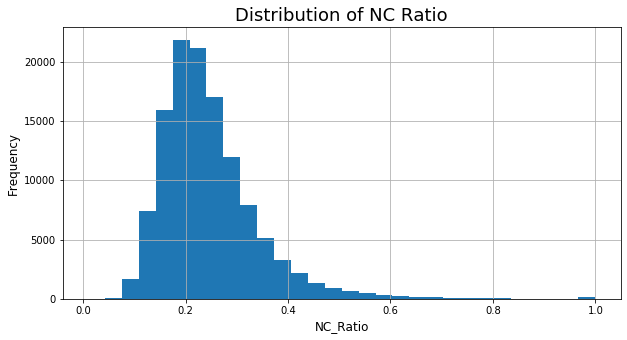

In [111]:
draw_histogram(df=cellsandnucleusP1, col='NC_Ratio', x_label='NC_Ratio', y_label='Frequency', title='Distribution of NC Ratio')

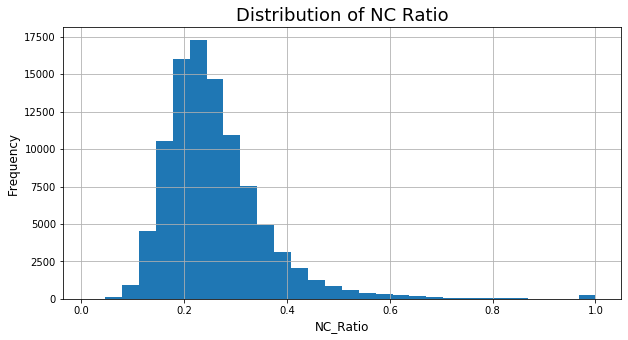

In [112]:
draw_histogram(df=cellsandnucleusP2, col='NC_Ratio', x_label='NC_Ratio', y_label='Frequency', title='Distribution of NC Ratio')

It's also worth getting a more fine-grained count of number of cells for each 0.1 increase in NC ratio

In [113]:
cellsandnucleusP1.groupby(pd.cut(cellsandnucleusP1['NC_Ratio'], np.arange(0, 1.1, 0.1)))['Metadata_Well_cell'].count()

NC_Ratio
(0.0, 0.1]      938
(0.1, 0.2]    40631
(0.2, 0.3]    53354
(0.3, 0.4]    18070
(0.4, 0.5]     4783
(0.5, 0.6]     1575
(0.6, 0.7]      546
(0.7, 0.8]      180
(0.8, 0.9]       62
(0.9, 1.0]      135
Name: Metadata_Well_cell, dtype: int64

In [114]:
cellsandnucleusP2.groupby(pd.cut(cellsandnucleusP2['NC_Ratio'], np.arange(0, 1.1, 0.1)))['Metadata_Well_cell'].count()

NC_Ratio
(0.0, 0.1]      466
(0.1, 0.2]    26232
(0.2, 0.3]    45664
(0.3, 0.4]    17616
(0.4, 0.5]     4624
(0.5, 0.6]     1421
(0.6, 0.7]      578
(0.7, 0.8]      199
(0.8, 0.9]       66
(0.9, 1.0]      289
Name: Metadata_Well_cell, dtype: int64

Identifying wells where cells with NC_ratio less than 0.1 and higher than 0.7 were observed, so that they may be visually inspected for poor segmentation

In [115]:
cellsandnucleusP1[cellsandnucleusP1['NC_Ratio'] <= 0.05][['Metadata_Well_cell', 'ObjectNumber_cell', 'NC_Ratio']]

,Metadata_Well_cell,ObjectNumber_cell,NC_Ratio
1545,B11,228,0.019947
26265,C4,1026,0.017070
32073,C8,969,0.020818
35645,D11,338,0.040879
49433,D8,775,0.040000
49974,D9,196,0.045835
52299,E10,994,0.047143
54093,E12,316,0.043158
55219,E1,393,0.038235
65988,E8,23,0.046142


In [116]:
cellsandnucleusP2[cellsandnucleusP2['NC_Ratio'] <= 0.05][['Metadata_Well_cell','Metadata_Site_cell', 'ObjectNumber_cell', 'NC_Ratio']]

,Metadata_Well_cell,Metadata_Site_cell,ObjectNumber_cell,NC_Ratio
7242,B4,1,256,0.022715
9364,B5,1,977,0.049357
31011,D11,1,583,0.047053
37409,D5,1,318,0.040197
54579,E8,1,23,0.049057
55133,E8,1,577,0.013058
59283,F12,1,807,0.044640
65180,F5,1,805,0.033540
79263,G5,1,498,0.033755
83046,G8,1,467,0.049535


In [121]:
cellsandnucleusP1[cellsandnucleusP1['NC_Ratio'] >= 0.5][['Metadata_Well_cell','Metadata_Site_cell', 'ObjectNumber_cell', 'NC_Ratio']]

,Metadata_Well_cell,Metadata_Site_cell,ObjectNumber_cell,NC_Ratio
93,B10,1,94,0.531429
193,B10,1,194,0.525027
301,B10,1,302,0.540881
308,B10,1,309,0.590264
343,B10,1,344,0.516598
...,...,...,...,...
120163,H9,1,1260,0.551213
120164,H9,1,1261,0.601054
120171,H9,1,1268,0.516742
120232,H9,1,1329,0.514028


In [122]:
cellsandnucleusP2[cellsandnucleusP2['NC_Ratio'] >= 0.5][['Metadata_Well_cell','Metadata_Site_cell', 'ObjectNumber_cell', 'NC_Ratio']]

,Metadata_Well_cell,Metadata_Site_cell,ObjectNumber_cell,NC_Ratio
1,B10,1,2,0.500379
3,B10,1,4,0.537118
34,B10,1,35,0.534608
43,B10,1,44,0.608108
92,B10,1,93,0.640936
...,...,...,...,...
96796,H9,1,608,0.537853
96809,H9,1,621,0.505445
96837,H9,1,649,0.536602
96880,H9,1,692,0.506614


### Identifying Outliers based on Nucleus Area

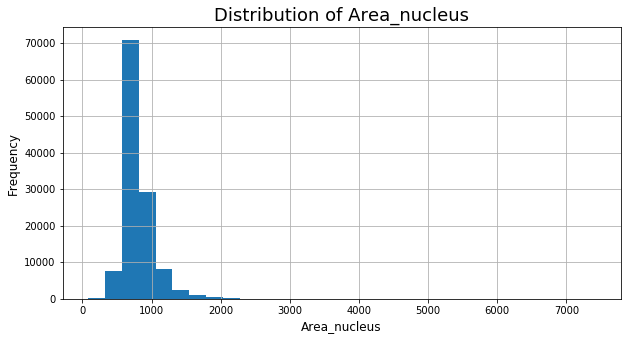

In [123]:
draw_histogram(df=cellsandnucleusP1, col='Area_nucleus', x_label='Area_nucleus', y_label='Frequency', title='Distribution of Area_nucleus')

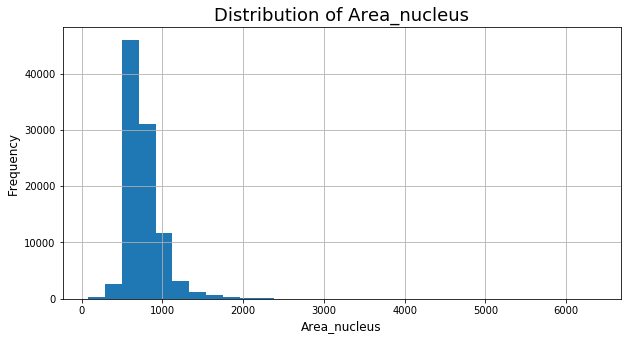

In [124]:
draw_histogram(df=cellsandnucleusP2, col='Area_nucleus', x_label='Area_nucleus', y_label='Frequency', title='Distribution of Area_nucleus')

In [125]:
cellsandnucleusP1.groupby(pd.cut(cellsandnucleusP1['Area_nucleus'], np.arange(0, 8500, 500)))['Metadata_Well_cell'].count()

Area_nucleus
(0, 500]          2380
(500, 1000]     101306
(1000, 1500]     14609
(1500, 2000]      1669
(2000, 2500]       212
(2500, 3000]        47
(3000, 3500]        26
(3500, 4000]         9
(4000, 4500]         4
(4500, 5000]         4
(5000, 5500]         4
(5500, 6000]         1
(6000, 6500]         1
(6500, 7000]         1
(7000, 7500]         1
(7500, 8000]         0
Name: Metadata_Well_cell, dtype: int64

In [126]:
cellsandnucleusP2.groupby(pd.cut(cellsandnucleusP2['Area_nucleus'], np.arange(0, 8500, 500)))['Metadata_Well_cell'].count()

Area_nucleus
(0, 500]         3184
(500, 1000]     83335
(1000, 1500]     9330
(1500, 2000]     1083
(2000, 2500]      142
(2500, 3000]       43
(3000, 3500]       18
(3500, 4000]       11
(4000, 4500]        3
(4500, 5000]        1
(5000, 5500]        1
(5500, 6000]        2
(6000, 6500]        2
(6500, 7000]        0
(7000, 7500]        0
(7500, 8000]        0
Name: Metadata_Well_cell, dtype: int64

In [143]:
cellsandnucleusP1[(cellsandnucleusP1['Area_nucleus'] > 5000) & (cellsandnucleusP1['Area_nucleus'] < 6500)][['Metadata_Well_cell', 'ObjectNumber_cell', 'Area_nucleus']]

,Metadata_Well_cell,ObjectNumber_cell,Area_nucleus
38225,D1,687,5451
74814,F2,745,6464
77246,F3,1721,5438
77268,F3,1743,5769
108600,H1,754,5016
108633,H1,787,5453


In [146]:
cellsandnucleusP2[(cellsandnucleusP2['Area_nucleus'] > 300) & (cellsandnucleusP2['Area_nucleus'] <= 350)][['Metadata_Well_cell', 'ObjectNumber_cell', 'Area_nucleus']]

,Metadata_Well_cell,ObjectNumber_cell,Area_nucleus
1249,B11,164,310
2818,B12,784,334
8730,B5,343,338
9581,B5,1194,334
9718,B6,23,331
...,...,...,...
91315,H4,172,345
91993,H4,850,340
92231,H4,1088,346
94912,H7,772,319


In [147]:
#cellsandnucleusP1[(cellsandnucleusP1['Area_nucleus'] > 150)]['Area_nucleus'].count()

In [148]:
cellsandnucleusP1.drop(cellsandnucleusP1[cellsandnucleusP1.NC_Ratio >= 0.5].index, inplace=True)
cellsandnucleusP1.shape

(117766, 44)

In [149]:
cellsandnucleusP2.drop(cellsandnucleusP2[cellsandnucleusP2.NC_Ratio >= 0.5].index, inplace=True)
cellsandnucleusP2.shape

(94593, 44)

In [150]:
cellsandnucleusP1.drop(cellsandnucleusP1[cellsandnucleusP1.NC_Ratio < 0.05].index, inplace=True)
cellsandnucleusP1.shape

(117747, 44)

In [151]:
cellsandnucleusP2.drop(cellsandnucleusP2[cellsandnucleusP2.NC_Ratio < 0.05].index, inplace=True)
cellsandnucleusP2.shape

(94581, 44)

In [152]:
cellsandnucleusP1.drop(cellsandnucleusP1[cellsandnucleusP1.Solidity_nucleus > 1].index, inplace=True)
cellsandnucleusP1.shape

(117747, 44)

In [153]:
cellsandnucleusP2.drop(cellsandnucleusP2[cellsandnucleusP2.Solidity_nucleus > 1].index, inplace=True)
cellsandnucleusP2.shape

(94581, 44)

In [154]:
cellsandnucleusP1.drop(cellsandnucleusP1[cellsandnucleusP1.Solidity_cell > 1].index, inplace=True)
cellsandnucleusP1.shape

(117747, 44)

In [155]:
cellsandnucleusP2.drop(cellsandnucleusP2[cellsandnucleusP2.Solidity_cell > 1].index, inplace=True)
cellsandnucleusP2.shape

(94581, 44)

In [159]:
cellsandnucleusP1.drop(cellsandnucleusP1[cellsandnucleusP1.Area_nucleus <= 400].index, inplace=True)
cellsandnucleusP1.shape

(117383, 44)

In [160]:
cellsandnucleusP2.drop(cellsandnucleusP2[cellsandnucleusP2.Area_nucleus <= 350].index, inplace=True)
cellsandnucleusP2.shape

(94389, 44)

In [117]:
#cellsandnucleus.head()

### Adding Experimental Condition Data

In [161]:
condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Metadata_Well          96 non-null     object
 1   Stimuli                96 non-null     int64 
 2   Stimuli treatment      96 non-null     object
 3   Well in Number format  96 non-null     int64 
 4   Wah in number format   96 non-null     int64 
 5   Wash                   96 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.6+ KB


In [162]:
cellsandnucleusP1 = pd.merge(cellsandnucleusP1,condition,left_on='Metadata_Well_cell',right_on='Metadata_Well')

In [163]:
cellsandnucleusP2 = pd.merge(cellsandnucleusP2,condition,left_on='Metadata_Well_cell',right_on='Metadata_Well')

In [164]:
cellsandnucleusP1.head()

,ImageNumber_cell,ObjectNumber_cell,Metadata_Plate_cell,Metadata_Site_cell,Metadata_Well_cell,Area_cell,Compactness_cell,Eccentricity_cell,EquivalentDiameter_cell,Extent_cell,...,Aspect_Ratio_Nucleus,Aspect_Ratio_Cell,PerimeterArea_Ratio_Cell,PerimeterArea_Ratio_Nucleus,Metadata_Well,Stimuli,Stimuli treatment,Well in Number format,Wah in number format,Wash
0,1,1,1,1,B10,1966,2.641447,0.940881,50.031879,0.350508,...,1.955027,2.952147,0.129937,0.155863,B10,1,IFNg,22,1,Full
1,1,2,1,1,B10,2165,3.124107,0.985814,52.502987,0.574271,...,1.492684,5.958025,0.134660,0.153068,B10,1,IFNg,22,1,Full
2,1,3,1,1,B10,2026,4.681052,0.979790,50.789599,0.405606,...,1.172827,4.999227,0.170395,0.157113,B10,1,IFNg,22,1,Full
3,1,4,1,1,B10,1474,3.302742,0.953729,43.321531,0.264158,...,1.459507,3.325922,0.167801,0.160498,B10,1,IFNg,22,1,Full
4,1,5,1,1,B10,2257,2.781580,0.973895,53.606918,0.337975,...,1.567809,4.405327,0.124447,0.137168,B10,1,IFNg,22,1,Full


In [165]:
cellsandnucleusP2.head()

,ImageNumber_cell,ObjectNumber_cell,Metadata_Plate_cell,Metadata_Site_cell,Metadata_Well_cell,Area_cell,Compactness_cell,Eccentricity_cell,EquivalentDiameter_cell,Extent_cell,...,Aspect_Ratio_Cell,Aspect_Ratio_Nucleus,PerimeterArea_Ratio_Cell,PerimeterArea_Ratio_Nucleus,Metadata_Well,Stimuli,Stimuli treatment,Well in Number format,Wah in number format,Wash
0,1,1,2,1,B10,3438,3.518467,0.930712,66.161904,0.300131,...,2.734093,1.725081,0.113404,0.154184,B10,1,IFNg,22,1,Full
1,1,3,2,1,B10,2432,2.798544,0.925823,55.646371,0.440580,...,2.645798,1.459741,0.120251,0.144985,B10,1,IFNg,22,1,Full
2,1,5,2,1,B10,1738,1.824989,0.884818,47.041368,0.636630,...,2.146216,1.253764,0.114871,0.148746,B10,1,IFNg,22,1,Full
3,1,6,2,1,B10,2230,3.274314,0.963679,53.285309,0.269715,...,3.744441,1.220343,0.135835,0.146008,B10,1,IFNg,22,1,Full
4,1,7,2,1,B10,1998,2.568163,0.893016,50.437413,0.492604,...,2.222096,1.236885,0.127092,0.150614,B10,1,IFNg,22,1,Full


In [166]:
cellsandnucleusP1.shape

(117383, 50)

In [167]:
cellsandnucleusP2.shape

(94389, 50)

In [168]:
cellsandnucleusP1.isna().sum()

ImageNumber_cell               0
ObjectNumber_cell              0
Metadata_Plate_cell            0
Metadata_Site_cell             0
Metadata_Well_cell             0
Area_cell                      0
Compactness_cell               0
Eccentricity_cell              0
EquivalentDiameter_cell        0
Extent_cell                    0
FormFactor_cell                0
MajorAxisLength_cell           0
MaxFeretDiameter_cell          0
MaximumRadius_cell             0
MeanRadius_cell                0
MedianRadius_cell              0
MinFeretDiameter_cell          0
MinorAxisLength_cell           0
Perimeter_cell                 0
Solidity_cell                  0
ImageNumber_nucleus            0
ObjectNumber_nucleus           0
Metadata_Site_nucleus          0
Area_nucleus                   0
Compactness_nucleus            0
Eccentricity_nucleus           0
EquivalentDiameter_nucleus     0
Extent_nucleus                 0
FormFactor_nucleus             0
MajorAxisLength_nucleus        0
MaxFeretDi

In [169]:
cellsandnucleusP2.isna().sum()

ImageNumber_cell               0
ObjectNumber_cell              0
Metadata_Plate_cell            0
Metadata_Site_cell             0
Metadata_Well_cell             0
Area_cell                      0
Compactness_cell               0
Eccentricity_cell              0
EquivalentDiameter_cell        0
Extent_cell                    0
FormFactor_cell                0
MajorAxisLength_cell           0
MaxFeretDiameter_cell          0
MaximumRadius_cell             0
MeanRadius_cell                0
MedianRadius_cell              0
MinFeretDiameter_cell          0
MinorAxisLength_cell           0
Perimeter_cell                 0
Solidity_cell                  0
ImageNumber_nucleus            0
ObjectNumber_nucleus           0
Metadata_Site_nucleus          0
Area_nucleus                   0
Compactness_nucleus            0
Eccentricity_nucleus           0
EquivalentDiameter_nucleus     0
Extent_nucleus                 0
FormFactor_nucleus             0
MajorAxisLength_nucleus        0
MaxFeretDi

In [170]:
(cellsandnucleusP1['Stimuli'] == 1).sum() #Check for how many cells are stimulated

95885

In [171]:
(cellsandnucleusP2['Stimuli'] == 1).sum() #Check for how many cells are stimulated

77789

In [172]:
cellsandnucleusP1.to_csv('compiled_data_file_for_jmpP1.csv', index=False)  

In [173]:
cellsandnucleusP2.to_csv('compiled_data_file_for_jmpP2.csv', index=False)  

## Pixels to Units Conversion (1pixel=0.6um)

In [131]:
cellsandnucleusP1.head()

NameError: name 'cellsandnucleus' is not defined

In [ ]:
cellsandnucleus[['Area_cell','Area_nucleus']] = cellsandnucleus[['Area_cell','Area_nucleus']].multiply(0.6*0.6, axis='index') 
cellsandnucleus.head(5)

In [ ]:
cellsandnucleus[['MajorAxisLength_cell',
'MaxFeretDiameter_cell',
'MaximumRadius_cell',
'MeanRadius_cell',
'MedianRadius_cell',
'MinFeretDiameter_cell',
'MinorAxisLength_cell',
'Perimeter_cell',
'EquivalentDiameter_cell',
'MajorAxisLength_nucleus',
'MaxFeretDiameter_nucleus',
'MaximumRadius_nucleus',
'MeanRadius_nucleus',
'MedianRadius_nucleus',
'MinFeretDiameter_nucleus',
'MinorAxisLength_nucleus',
'Perimeter_nucleus',
'EquivalentDiameter_nucleus']] = cellsandnucleus[['MajorAxisLength_cell',
'MaxFeretDiameter_cell',
'MaximumRadius_cell',
'MeanRadius_cell',
'MedianRadius_cell',
'MinFeretDiameter_cell',
'MinorAxisLength_cell',
'Perimeter_cell',
'EquivalentDiameter_cell',
'MajorAxisLength_nucleus',
'MaxFeretDiameter_nucleus',
'MaximumRadius_nucleus',
'MeanRadius_nucleus',
'MedianRadius_nucleus',
'MinFeretDiameter_nucleus',
'MinorAxisLength_nucleus',
'Perimeter_nucleus',
'EquivalentDiameter_nucleus']].multiply(0.6, axis = 'index')    

In [ ]:
cellsandnucleus[['PerimeterArea_Ratio_Cell']] = cellsandnucleus[['PerimeterArea_Ratio_Cell']].multiply(1/0.6, axis='index') 
cellsandnucleus.head(5)

In [ ]:
cellsandnucleus[['PerimeterArea_Ratio_Nucleus']] = cellsandnucleus[['PerimeterArea_Ratio_Nucleus']].multiply(1/0.6, axis='index') 
cellsandnucleus.head(5)

In [ ]:
cellsandnucleus.info()

In [ ]:
cellsandnucleus.head()

In [ ]:
cellsandnucleus[cellsandnucleus['Metadata_Well_cell'] == 'F2']

## Data Visualization
To find outliers based on area, perimeter of cell

In [ ]:
draw_histogram(df=cellsandnucleus, col='Area_cell', x_label='Cell Area in sq.micro-metres',
              y_label='Frequency', title='Distribution of Cell Area')

In [ ]:
max_area = cellsandnucleus['Area_cell'].max()
min_area = cellsandnucleus['Area_cell'].min()
print(f'Max area = {max_area} and min area = {min_area}')

Looks like there are massive outliers (14k sq area). 

In [ ]:
cellsandnucleus.groupby(pd.cut(cellsandnucleus['Area_cell'], np.arange(0, 15000, 500)))['Area_cell'].count()

In [ ]:
# cellsandnucleus[((cellsandnucleus['Area_cell'] >= 4000) & (cellsandnucleus['Area_cell'] <= 4500))]
cellsandnucleus[(cellsandnucleus['Area_cell'] >= 500)]

In [ ]:
#cellsandnucleus[(cellsandnucleus['ObjectNumber_cell'] == 1937) & (cellsandnucleus['Metadata_Well_cell'] == 'F2')]['NC_Ratio'] 

In [ ]:
#cellsandnucleus.drop(cellsandnucleus[cellsandnucleus.AreaShape_Area_cell >= 6300].index, inplace=True)
#cellsandnucleus.shape

In [ ]:
cellsandnucleus.to_csv('compiled_data_file_units.csv', index=False) 
cellsandnucleus.shape

In [ ]:
cellsandnucleus.drop(['Metadata_Well_cell',
         'ImageNumber_nucleus',
         'ObjectNumber_nucleus',
         'objectnumbercheck',
], axis=1, inplace = True)

## Normalization

In [ ]:
from sklearn import preprocessing 
def get_min_max_scaler(col_vals):
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit(col_vals)
    return min_max_scaler

In [ ]:
dtypes = set()
scaler_dict = {}
for col in cellsandnucleus.columns:
    col_dtype = cellsandnucleus[col].dtype
    if col_dtype == 'float64' and col not in ['objectnumbercheck', 'NSCEV_Concentration'] :
        print(f'Normalizing column {col}')
        scaler_dict[col] = get_min_max_scaler(cellsandnucleus[col].values.reshape(-1,1))

In [ ]:
for col in cellsandnucleus.columns:
    col_dtype = cellsandnucleus[col].dtype
    if col_dtype == 'object':
        print(f'{col}')

In [ ]:
for k, scaler in scaler_dict.items():
    print(f'COL {k} min {scaler.data_min_} max {scaler.data_max_} diff {scaler.data_range_} num_samples {scaler.n_samples_seen_}')

In [ ]:
for k, scaler in scaler_dict.items():
    cellsandnucleus[k] = scaler.transform(cellsandnucleus[k].values.reshape(-1,1))

In [ ]:
cellsandnucleus.head()

In [ ]:
cellsandnucleus.shape

In [ ]:
cellsandnucleus.to_csv('compiled_data_file_normalized.csv')

In [ ]:
data = []
columns = ['Feature', 'Min', 'Max', 'Range', 'Sample_Count']
for k, scaler in scaler_dict.items():
    data.append([k, scaler.data_min_[0], scaler.data_max_[0], scaler.data_range_[0], scaler.n_samples_seen_])
pd.DataFrame(data=data, columns=columns).to_csv('compiled_data_file_normalization_stats.csv', index=False)